# MNIST Handwritten Digit Recognition

# Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST datasets

In [5]:
train_df = pd.read_csv("./MNIST Dataset/mnist_train.csv")
test_df = pd.read_csv("./MNIST Dataset/mnist_test.csv")

In [6]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# For train and test both we will use train.csv (Taking train data as complete data)

In [8]:
train_df.shape

(60000, 785)

# Data Preparation for Model Building

In [9]:
y=train_df['label']
x=train_df.drop('label',axis=1)


In [10]:
x_for_test_data = test_df[:]

2


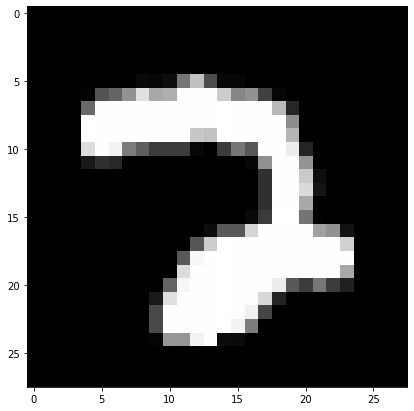

In [11]:
plt.figure(figsize=(7,7))
some_digit=120
some_digit_image = x.iloc[some_digit].to_numpy().reshape(28, 28)
plt.imshow(np.reshape(some_digit_image, (28,28)), cmap=plt.cm.gray)
print(y[some_digit])

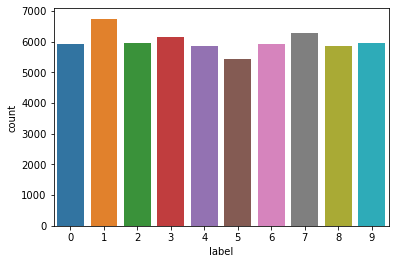

In [14]:
sns.countplot(x = 'label', data = train_df)
plt.show()

#### we can conclude that our dataset is balanced

# Splitting the train data  into train and test 

In [15]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# **Models**

# KNN

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

In [5]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_train.shape

(29400, 784)

# k=5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([8, 1, 9, ..., 5, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8032539682539682
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1200
           1       0.99      0.91      0.95      1389
           2       0.93      0.81      0.87      1294
           3       0.94      0.77      0.85      1355
           4       0.99      0.53      0.69      1222
           5       0.94      0.61      0.74      1085
           6       0.95      0.91      0.93      1256
           7       0.95      0.85      0.90      1359
           8       0.59      0.89      0.71      1209
           9       0.84      0.71      0.77      1231

    accuracy                           0.80     12600
   macro avg       0.86      0.80      0.81     12600
weighted avg       0.87      0.80      0.81     12600

[[1196    0    0    0    0    0    3    0    1    0]
 [  39 1262   15    2    2    0    9    4   54    2]
 [ 177    2 1051   11    0    0    8    2   42    1]
 [ 116    1   24 1049    0   25    1    4  132    3]
 [ 339    

#### **From the classification report, it can be seen that the 5NN  model has an good performance, ranging from precision, recall, f1-score, and support. Accuracy also shows in value of 80.3%.|**

In [ ]:
#y_pred_on_test_data = classifier.predict(x_for_test_data)
#y_pred_on_test_data

# SVM

## **Linear Model**

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',C=10,random_state = 0) # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(x_test)

In [ ]:
y_pred_svm

array([8, 1, 9, ..., 3, 0, 9])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

0.8051190476190476
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       816
           1       0.96      0.65      0.78       909
           2       0.92      0.77      0.84       846
           3       0.76      0.89      0.82       937
           4       0.85      0.91      0.88       839
           5       0.96      0.29      0.45       702
           6       0.90      0.95      0.92       785
           7       0.95      0.77      0.85       893
           8       0.49      0.96      0.65       835
           9       0.85      0.82      0.83       838

    accuracy                           0.81      8400
   macro avg       0.85      0.80      0.80      8400
weighted avg       0.85      0.81      0.80      8400

[[800   0   0   2   2   3   1   1   7   0]
 [  0 594   4   5   1   0   1  13 291   0]
 [ 14  12 654  39  18   0  23   4  80   2]
 [  6   3  10 836   1   4   5   2  66   4]
 [  5   1   9   1 763   0  15   0   5  40]
 [ 31  

In [ ]:
#y_pred_on_test_data_svm = clf.predict(x_for_test_data)
#y_pred_on_test_data_svm

In [ ]:
#print(accuracy_score(y_test, y_pred_on_test_data_svm))

#### **Here using Linear SVM also we are getting accuracy approx 80.5 %**

# Let's try to use Hyperparameter Tuning to Improve Model Performance.

In [ ]:
model_params = {
     'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [1,10],
            'kernel': ['rbf','linear'],
            'gamma': [0.3, 0.5, 0.7, 0.9]
        }  
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [7,11,13]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clfgrid =  GridSearchCV(mp['model'], mp['params'], cv=5,n_jobs = -1 ,return_train_score=False)
    clfgrid.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clfgrid.best_score_,
        'best_params': clfgrid.best_params_
    })
    
df_grid = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_grid

In [ ]:
#Predict the response for test dataset
y_pred_grid = clfgrid.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))
print(confusion_matrix(y_test, y_pred_grid))

# KNN with best parameters 

# k=7

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([8, 1, 9, ..., 3, 0, 9])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8296428571428571
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       816
           1       1.00      0.93      0.96       909
           2       0.94      0.85      0.89       846
           3       0.94      0.82      0.87       937
           4       0.99      0.55      0.70       839
           5       0.96      0.62      0.75       702
           6       0.93      0.92      0.92       785
           7       0.96      0.87      0.91       893
           8       0.60      0.94      0.73       835
           9       0.82      0.78      0.80       838

    accuracy                           0.83      8400
   macro avg       0.87      0.83      0.83      8400
weighted avg       0.87      0.83      0.83      8400

[[813   0   0   0   0   0   2   0   1   0]
 [  8 847   7   0   0   0   8   0  38   1]
 [ 81   2 715  10   0   0   8   0  29   1]
 [ 41   0  15 765   0  12   1   5  95   3]
 [178   0   5   0 458   0  18   5  79  96]
 [ 88  

## **7NN-83% accuracy**

# k=23

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 23)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([8, 1, 9, ..., 5, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8355555555555556
              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1200
           1       1.00      0.93      0.96      1389
           2       0.94      0.87      0.91      1294
           3       0.93      0.84      0.88      1355
           4       1.00      0.59      0.74      1222
           5       0.96      0.58      0.72      1085
           6       0.92      0.93      0.92      1256
           7       0.96      0.85      0.90      1359
           8       0.57      0.95      0.71      1209
           9       0.83      0.78      0.81      1231

    accuracy                           0.84     12600
   macro avg       0.88      0.83      0.83     12600
weighted avg       0.88      0.84      0.84     12600

[[1191    0    0    0    0    0    2    0    7    0]
 [   1 1291   14    3    0    0   12    1   66    1]
 [ 100    0 1132    9    0    0   14    2   35    2]
 [  45    0   14 1132    0   19    0    4  138    3]
 [ 155    

# **23 NN-83.5% accuracy**

#k=3

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 9, ..., 5, 0, 0])

In [8]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7597619047619047
              precision    recall  f1-score   support

           0       0.39      0.99      0.56      1200
           1       0.99      0.90      0.94      1389
           2       0.93      0.75      0.83      1294
           3       0.93      0.68      0.79      1355
           4       0.99      0.49      0.66      1222
           5       0.95      0.54      0.69      1085
           6       0.95      0.89      0.92      1256
           7       0.93      0.83      0.88      1359
           8       0.58      0.76      0.66      1209
           9       0.84      0.72      0.77      1231

    accuracy                           0.76     12600
   macro avg       0.85      0.76      0.77     12600
weighted avg       0.85      0.76      0.78     12600

[[1193    0    0    0    0    0    3    0    4    0]
 [  47 1248   15    8    2    0   11    2   55    1]
 [ 270    0  966    7    0    0    8    1   41    1]
 [ 247    1   22  924    0   20    1    2  136    2]
 [ 424    

# **3 NN-76%**

# SVM with best parameters

# kernel='rbf'

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=10, gamma=0.001)

clf.fit(x_train, y_train)

y_pred_svm = clf.predict(x_test)

In [ ]:
y_pred_svm

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

0.10269841269841269
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1200
           1       0.00      0.00      0.00      1389
           2       0.10      1.00      0.19      1294
           3       0.00      0.00      0.00      1355
           4       0.00      0.00      0.00      1222
           5       0.00      0.00      0.00      1085
           6       0.00      0.00      0.00      1256
           7       0.00      0.00      0.00      1359
           8       0.00      0.00      0.00      1209
           9       0.00      0.00      0.00      1231

    accuracy                           0.10     12600
   macro avg       0.01      0.10      0.02     12600
weighted avg       0.01      0.10      0.02     12600

[[   0    0 1200    0    0    0    0    0    0    0]
 [   0    0 1389    0    0    0    0    0    0    0]
 [   0    0 1294    0    0    0    0    0    0    0]
 [   0    0 1355    0    0    0    0    0    0    0]
 [   0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Poly

In [9]:
from sklearn import svm
clf = svm.SVC(kernel='poly')

clf.fit(x_train, y_train)

y_pred_svm = clf.predict(x_test)

In [10]:
y_pred_svm

array([8, 1, 9, ..., 8, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

0.8346031746031746
              precision    recall  f1-score   support

           0       0.61      1.00      0.75      1200
           1       0.97      0.95      0.96      1389
           2       0.90      0.87      0.89      1294
           3       0.84      0.91      0.87      1355
           4       0.96      0.69      0.80      1222
           5       0.98      0.36      0.53      1085
           6       0.92      0.90      0.91      1256
           7       0.98      0.79      0.87      1359
           8       0.68      0.97      0.80      1209
           9       0.84      0.84      0.84      1231

    accuracy                           0.83     12600
   macro avg       0.87      0.83      0.82     12600
weighted avg       0.87      0.83      0.83     12600

[[1197    0    0    0    1    0    0    0    2    0]
 [   2 1325   30    8    0    0    4    0   20    0]
 [  70    5 1132   19   13    0   21    8   25    1]
 [  36    2    8 1231    0    4    5    6   59    4]
 [ 156    

# SVM-Poly-83.4%

# Logistic Regression

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [18]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 1000, max_iter = 1000)
log_classifier.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1000)

In [19]:
y_pred_log = log_classifier.predict(scaler.transform(x_test))

In [20]:
y_pred_log

array([7, 3, 8, ..., 5, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [39]:
print(accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

0.9098333333333334
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1805
           1       0.95      0.97      0.96      1994
           2       0.88      0.88      0.88      1759
           3       0.89      0.88      0.89      1846
           4       0.91      0.92      0.91      1726
           5       0.89      0.88      0.88      1653
           6       0.94      0.94      0.94      1787
           7       0.92      0.91      0.92      1937
           8       0.88      0.86      0.87      1730
           9       0.89      0.90      0.89      1763

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



In [55]:
import io

classification_rep = classification_report(y_test, y_pred_log, output_dict=True)

# Extract relevant data from the classification report
data = []

for key, value in classification_rep.items():
    if key not in ['accuracy', 'macro avg', 'weighted avg']:
        row = [key] + [value[label] for label in value.keys()]
        print(row)
        data.append(row)
# Create DataFrame from the extracted data
columns = ['class', 'precision', 'recall', 'f1-score', 'support']
df = pd.DataFrame(data, columns=columns)
# df = df.set_index('class')

# Display the DataFrame
df

['0', 0.9575418994413408, 0.949584487534626, 0.9535465924895689, 1805]
['1', 0.9502463054187192, 0.9674022066198595, 0.9587475149105368, 1994]
['2', 0.8782014797951053, 0.8772029562251279, 0.8777019340159272, 1759]
['3', 0.8882224645583424, 0.8824485373781148, 0.8853260869565216, 1846]
['4', 0.9061433447098977, 0.9229432213209734, 0.9144661308840414, 1726]
['5', 0.8850152905198777, 0.8753781004234725, 0.8801703163017032, 1653]
['6', 0.9370824053452116, 0.9418019026301063, 0.9394362266257327, 1787]
['7', 0.9185684647302904, 0.9143004646360351, 0.9164294954721861, 1937]
['8', 0.8789131718842291, 0.8601156069364162, 0.8694127957931639, 1730]
['9', 0.8881394041596402, 0.8961996596710153, 0.8921513269339356, 1763]


,class,precision,recall,f1-score,support
0,0,0.957542,0.949584,0.953547,1805
1,1,0.950246,0.967402,0.958748,1994
2,2,0.878201,0.877203,0.877702,1759
3,3,0.888222,0.882449,0.885326,1846
4,4,0.906143,0.922943,0.914466,1726
5,5,0.885015,0.875378,0.880170,1653
6,6,0.937082,0.941802,0.939436,1787
7,7,0.918568,0.914300,0.916429,1937
8,8,0.878913,0.860116,0.869413,1730
9,9,0.888139,0.896200,0.892151,1763


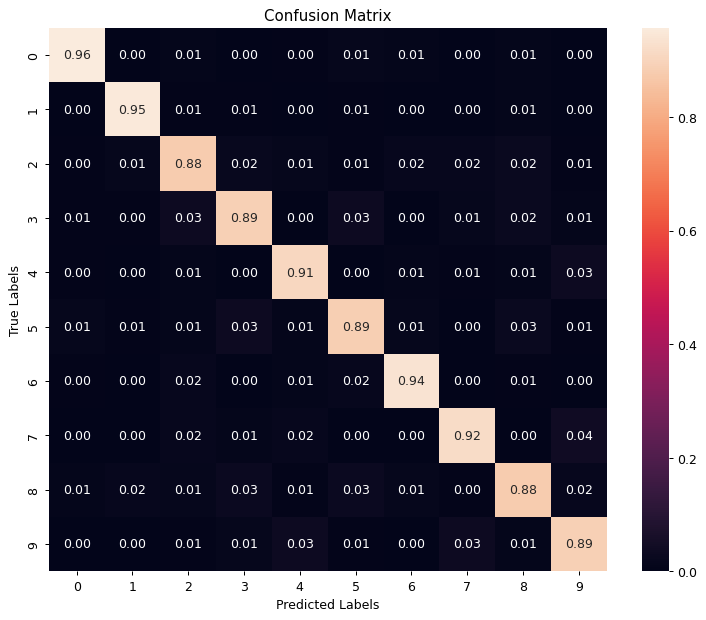

In [38]:
cm = confusion_matrix(y_test, y_pred_log)

# Calculate row sums
row_sums = cm.sum(axis=0)

# Divide each row by its sum (row normalization)
normalized_cm = cm / row_sums[np.newaxis, :]
plt.figure(figsize = (10, 8), dpi = 90)
sns.heatmap(normalized_cm, annot=True, fmt='.2f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#  Summarize the Model Performance :
Linear SVC : 80.5 % 

SVC rbf : 11 %

SVC poly : 83.4% %

Logistic regression : 82.6 %

3-NN: 76 %

5-NN :80.3%

7-NN: 83%

23-NN: 83.5%
